In [1]:
!pip install antigranular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.2 MB/s eta 0:00:00


In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
import antigranular as ag
session = ag.login(<client_id>,<client_secret>, dataset = "Car Evaluation")

Loading dataset "Car Evaluation" to the kernel...
Dataset "Car Evaluation" loaded to the kernel as car_evaluation
Connected to Antigranular server session id: 2aac3919-6a20-455f-995d-3dd18b0f3e96, the session will time out if idle for 60 minutes
Cell magic '%%ag' registered successfully, use `%%ag` in a notebook cell to execute your python code on Antigranular private python server
🚀 Everything's set up and ready to roll!


In [5]:
%%ag
import pandas as pd

In [6]:
%%ag
train_x = car_evaluation["train_x"]
train_y = car_evaluation["train_y"]
test_x = car_evaluation["test_x"]

ag_print(train_x.columns)
ag_print(train_y.columns)

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')
Index(['class'], dtype='object')



In [7]:
session.privacy_odometer()

{'total_epsilon_used': 0.0,
 'total_delta_used': 0.0,
 'library_costs': None,
 'dataset_costs': None}

## Data Preprocessing

In [8]:
%%ag
unique_categories = {}
for column in test_x.columns:
    unique_categories.update({column: test_x[column].unique().tolist()})
ag_print(unique_categories)


{'buying': ['high', 'med', 'low', 'vhigh'], 'maint': ['high', 'low', 'vhigh', 'med'], 'doors': ['4', '2', '5more', '3'], 'persons': ['2', '4', 'more'], 'lug_boot': ['med', 'big', 'small'], 'safety': ['high', 'med', 'low']}



In [9]:
%%ag
encoding_scheme_train_x_gen = {}

for column, values in unique_categories.items():
    encoding_scheme_train_x_gen[column] = {value: idx for idx, value in zip(range(len(values)), values)}

ag_print(encoding_scheme_train_x_gen)

{'buying': {'high': 0, 'med': 1, 'low': 2, 'vhigh': 3}, 'maint': {'high': 0, 'low': 1, 'vhigh': 2, 'med': 3}, 'doors': {'4': 0, '2': 1, '5more': 2, '3': 3}, 'persons': {'2': 0, '4': 1, 'more': 2}, 'lug_boot': {'med': 0, 'big': 1, 'small': 2}, 'safety': {'high': 0, 'med': 1, 'low': 2}}



In [10]:
%%ag
encoding_scheme_train_x = {'buying': {'high': 2, 'med': 1, 'low': 0, 'vhigh': 3}, 'maint': {'high': 2, 'low': 0, 'vhigh': 3, 'med': 1}, 'doors': {'4': 2, '2': 0, '5more': 2, '3': 1}, 'persons': {'2': 0, '4': 1, 'more': 2}, 'lug_boot': {'med': 1, 'big': 2, 'small': 0}, 'safety': {'high': 2, 'med': 1, 'low': 0}}


In [11]:
%%ag
ag_print(encoding_scheme_train_x)

{'buying': {'high': 2, 'med': 1, 'low': 0, 'vhigh': 3}, 'maint': {'high': 2, 'low': 0, 'vhigh': 3, 'med': 1}, 'doors': {'4': 2, '2': 0, '5more': 2, '3': 1}, 'persons': {'2': 0, '4': 1, 'more': 2}, 'lug_boot': {'med': 1, 'big': 2, 'small': 0}, 'safety': {'high': 2, 'med': 1, 'low': 0}}



Apply Encoding for train_x

In [12]:
%%ag
for col, value in encoding_scheme_train_x.items():
    train_x[col] = train_x[col].map(value, eps=1)

In [13]:
%%ag
ag_print(train_x.describe(eps=.1))

            buying        maint        doors      persons     lug_boot  \
count  1358.000000  1358.000000  1358.000000  1358.000000  1358.000000   
mean      1.974546     1.048343     2.001531     1.511701     0.000000   
std       1.354771     1.416470     1.344306     1.597398     1.769456   
min       2.726555     0.184113     3.866716     1.947304     0.880934   
25%       2.228454     2.455285     1.013581     1.964125     1.991198   
50%       2.013806     1.200937     1.524523     3.248167     0.481295   
75%       2.975129     3.951681     1.266021     2.522474     1.660664   
max       3.599717     0.025667     3.588946     2.705604     3.807042   

            safety  
count  1358.000000  
mean      0.000000  
std       1.219277  
min       2.317483  
25%       1.478547  
50%       1.144096  
75%       1.590604  
max       2.200355  



Apply encoding train_y

In [14]:
%%ag
train_y_schema = {
    'unacc': 0,
    'acc': 1,
    'good': 2,
    'vgood': 3
}

train_y[train_y.columns[0]] = train_y[train_y.columns[0]].map(train_y_schema, eps=1)

In [15]:
%%ag
ag_print(train_y.describe(eps=.1))

             class
count  1298.000000
mean      0.450128
std       1.211663
min       0.329669
25%       0.465347
50%       0.678998
75%       0.210526
max       3.777269



## Data Visualization

Join two dataset train_x and train_y

In [16]:
%%ag
train_data = train_x.join(train_y, how="inner")

In [17]:
%%ag
mean_class_0 = train_data.where(train_data['class'] == 0).mean(eps=1)
ag_print(mean_class_0)
export(mean_class_0, 'mean_class_0')

Setting up exported variable in local environment: mean_class_0
buying      1.611462
maint       1.663233
doors       1.204141
persons     0.807181
lug_boot    0.931383
safety      0.739894
class       0.000695
dtype: float64



In [18]:
%%ag
mean_class_1 = train_data.where(train_data['class'] == 1).mean(eps=1)
mean_class_2 = train_data.where(train_data['class'] == 2).mean(eps=1)
mean_class_3 = train_data.where(train_data['class'] == 3).mean(eps=1)
export(mean_class_1, 'mean_class_1')
export(mean_class_2, 'mean_class_2')
export(mean_class_3, 'mean_class_3')


Setting up exported variable in local environment: mean_class_1
Setting up exported variable in local environment: mean_class_2
Setting up exported variable in local environment: mean_class_3


In [19]:
# to pandas dataframe
df = pd.DataFrame([mean_class_0, mean_class_1, mean_class_2, mean_class_3])

In [20]:
df.drop(columns=['class'], inplace=True)

<Axes: >

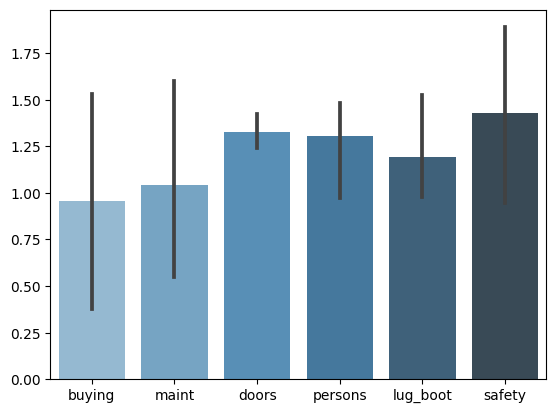

In [21]:
# sns barplot
sns.barplot(data=df, palette="Blues_d")

Observations:

- **buying**: There are noticeable differences in the mean buying price among different classes.
- **maint**: Similar to buying, maintenance cost also shows some variation.
- **safety**: Safety shows clear variations, and looks like most important.
  
The remaining features (**doors**, **persons**, **lug_boot**) exhibit less variation among classes.

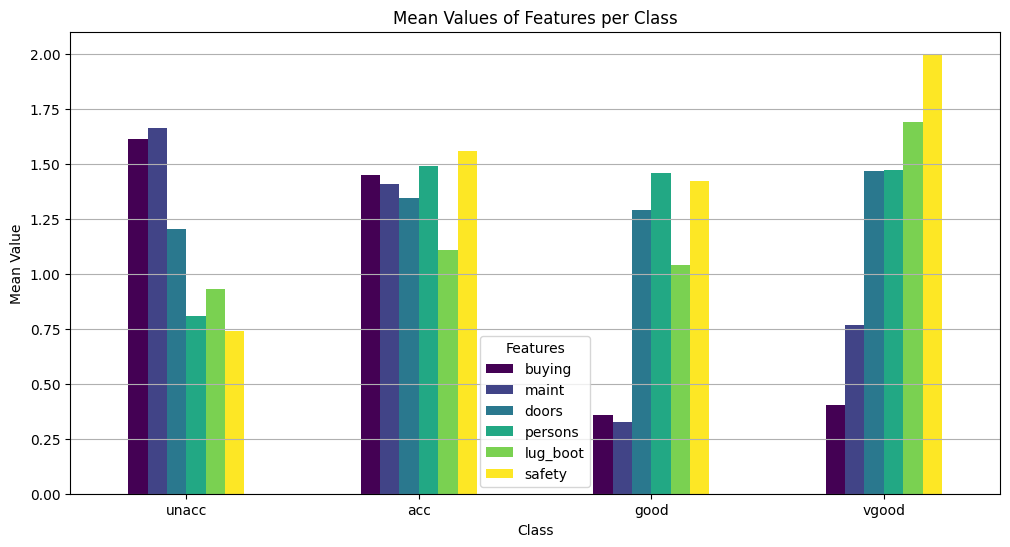

In [22]:
ax = df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Mean Values of Features per Class')
plt.xlabel('Class')
plt.ylabel('Mean Value')
plt.xticks(ticks=[0, 1, 2, 3], labels=['unacc', 'acc', 'good', 'vgood'], rotation=0)
plt.legend(title='Features')
plt.grid(axis='y')

## Observations:
1. **Safety Considerations:**
   - 'vgood' cars tend to have the highest mean safety rating, suggesting that safety is a crucial factor in determining the highest class of cars.
   - 'unacc' (unacceptable) cars have the lowest mean safety rating, highlighting that lower safety ratings are a significant factor for classifying cars into this undesirable category.

2. **Economic Aspects (Buying & Maintenance):**
   - 'unacc' cars tend to have higher mean buying and maintenance costs, indicating that more expensive and high-maintenance cars are often deemed less acceptable.
   - 'good' cars have the lowest mean buying and maintenance costs, hinting that more economically friendly cars are often classified in this category.

3. **Luggage Boot Size:**
   - 'vgood' cars have the highest mean luggage boot size, showing a potential preference for larger boot sizes in this class.
   - The other classes do not show significant variations in the luggage boot size.

4. **Capacity (Persons & Doors):**
   - 'unacc' cars have a lower mean value for persons, suggesting that cars with lower seating capacity tend to be categorized as unacceptable.
   - There isn't a clear pattern for the number of doors across classes, implying that this feature might not be as impactful in classifying cars.

### Summary:

- Safety is a pivotal factor across all classes, with higher safety ratings generally correlating with more favorable classes.
- Economic aspects (buying and maintenance costs) appear to significantly impact the classification, especially distinguishing 'unacc' and 'good' cars.
- Features like the number of doors might not be significant in determining car classes due to the lack of clear variation across different classes.

This analysis could inform the feature selection or weighting in a predictive model, focusing on safety and economic aspects as potentially influential variables.

In [23]:
%%ag
ag_print(train_data['class'].describe(eps=1))

count    1382.000000
mean        0.364504
std         0.640036
min         0.131073
25%         0.003250
50%         0.211481
75%         0.482428
max         3.776052
Name: series, dtype: float64



In [24]:
session.privacy_odometer()

{'total_epsilon_used': 12.2,
 'total_delta_used': 0.0,
 'library_costs': None,
 'dataset_costs': None}

## Rule based Model

In [25]:
%%ag
# encode test x
for col, value in encoding_scheme_train_x.items():
    test_x[col] = test_x[col].map(value)

In [26]:
%%ag
ag_print(test_x)

     buying  maint  doors  persons  lug_boot  safety
0         2      2      2        0         1       2
1         1      0      0        1         1       1
2         2      2      2        0         2       1
3         0      2      2        1         1       1
4         1      0      2        2         1       0
..      ...    ...    ...      ...       ...     ...
341       3      3      2        2         0       1
342       3      1      2        0         1       1
343       1      0      0        2         0       0
344       3      3      2        2         0       2
345       1      1      0        0         1       1

[346 rows x 6 columns]



In [27]:
%%ag
import op_snsql

/usr/local/lib/python3.10/site-packages/opendp/typing.py:28: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: 'bool',  # np.bool_



In [29]:
%%ag
privacy = op_snsql.Privacy(epsilon=1.0)
reader = op_snsql.from_df(df=train_data, privacy=privacy)

In [30]:
%%ag
result = reader.execute("SELECT count(class) FROM df.table GROUP BY class")


In [31]:
%%ag
ag_print(result)

[['???'], [974], [304], [58], [48]]



In [33]:
%%ag
export(result, 'result')

Setting up exported variable in local environment: result


In [32]:
session.privacy_odometer()

{'total_epsilon_used': 14.2,
 'total_delta_used': 1.5543122344752192e-15,
 'library_costs': None,
 'dataset_costs': None}

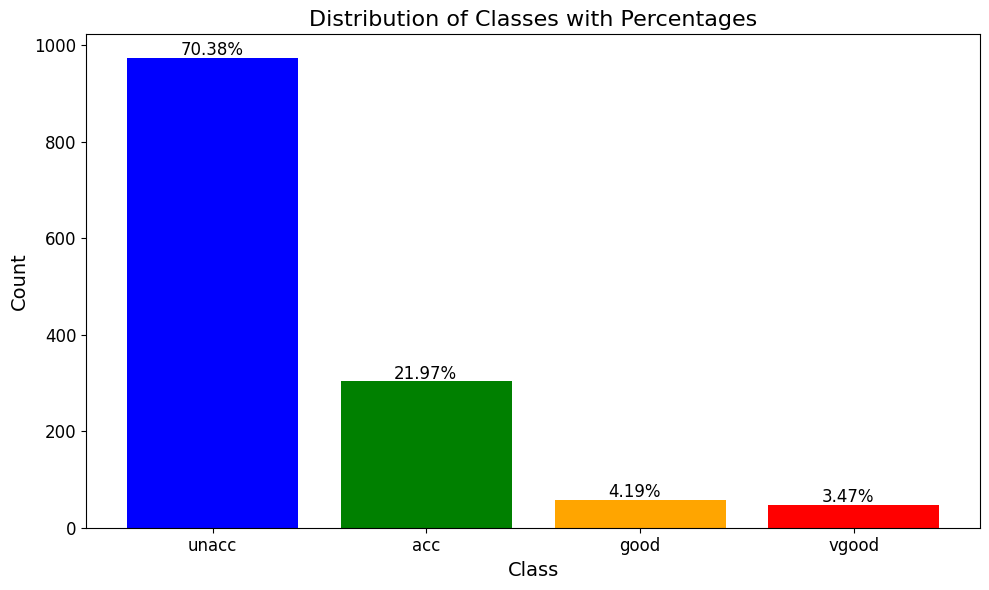

In [34]:
data_counts = [item[0] for item in result[1:]]
labels = ['unacc', 'acc', 'good', 'vgood']

total_count = sum(data_counts)

# Calculate percentages
percentages = [(count/total_count)*100 for count in data_counts]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, data_counts, color=['blue', 'green', 'orange', 'red'])

for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, # position percentage at the top
             bar.get_height() + 5,
             f'{percentage:.2f}%',
             fontsize=12)

plt.title('Distribution of Classes with Percentages', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


### Observations:
* The data is imbalanced, with the 'unacc' category dominating the distribution.
* 'vgood' and 'good' categories are considerably very less frequent in the data.

The class 'unacc' has the highest count and represents the majority of the data, hence can be default for rule based model

In [35]:
%%ag
# simple rule based
def rule_based_model(data):
    predictions = []
    for _, row in data.iterrows():
        if row['safety'] == 0:
            predictions.append('unacc')
        elif row['buying'] == 0 and row['maint'] == 0:
            predictions.append('acc')
        else:
            predictions.append('unacc')
    return predictions

In [36]:
%%ag
predictions = rule_based_model(test_x)

In [37]:
%%ag
submit_predictions(pd.DataFrame(predictions))

score: {'leaderboard': 0.7552501692961519, 'logs': {'BIN_ACC': 0.7552501692961519}}



In [38]:
session.terminate_session()

{'status': 'ok'}